In [50]:
# Kemp Carswell 801017179
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('C:/Users/kemp/Downloads/D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

99

In [52]:
X1 = df.values[:, 0] # get input values from first column
X2 = df.values[:, 1] # get input values from second column
X3 = df.values[:, 2] # get input values from third column
y = df.values[:, 3] # get output values from fourth column
m = len(y) # Number of training examples
print('X1 = ', X1[: 5]) # Show only first 5 records to make sure right column was grabbed
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)

X1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
X2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
X3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


In [53]:
#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1))
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))

In [54]:
theta = np.zeros(2)

In [55]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [66]:
def gradient_descent(X, y, theta, alpha, iterations):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
 cost_history = np.zeros(iterations)
 for i in range(iterations):
     predictions = X.dot(theta)
     errors = np.subtract(predictions, y)
     sum_delta = (alpha / m) * X.transpose().dot(errors);
     theta = theta - sum_delta;
     cost_history[i] = compute_cost(X, y, theta)
 return theta, cost_history

In [67]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.05;
Xx = X1; # change for which X value you are testing

In [68]:
theta, cost_history = gradient_descent(Xx, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)


Final value of theta = [ 5.99113956 -2.06191404]
cost_history = [5.291052   5.15332621 5.0424164  ... 0.98246683 0.98246683 0.98246683]


Text(0.5, 1.0, 'Convergence of gradient descent')

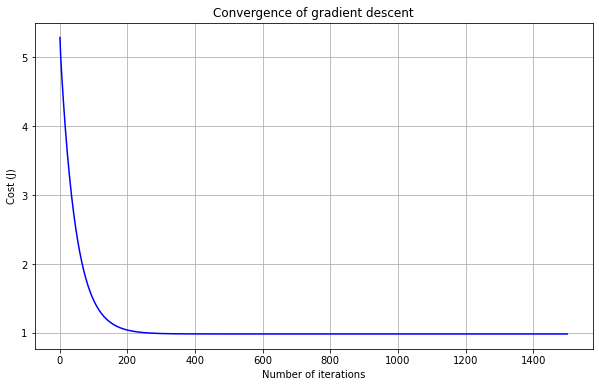

In [69]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

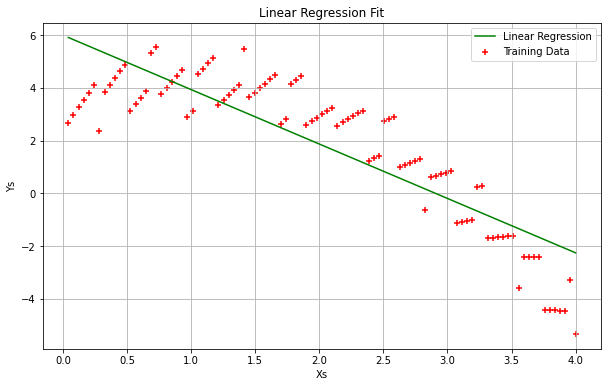

In [70]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(Xx[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(Xx[:,1],Xx.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Xs')
plt.ylabel('Ys')
plt.title('Linear Regression Fit')
plt.legend()